<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here



In [511]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Load the data

In [512]:
df = pd.read_csv('train.csv')
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [513]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [514]:
features = ['keyword','location', 'text']
# print(df['keyword'].value_counts().count())
x = df[features]
y = df[['target']]

Plot the count for each target

target
0         4342
1         3271
dtype: int64


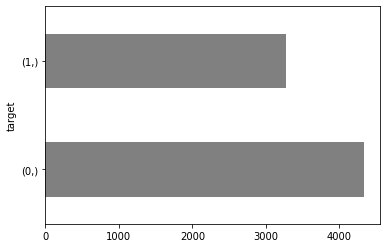

In [515]:
y.value_counts().plot(kind='barh', color='grey')
print(y.value_counts())

Print the unique keywords

In [516]:
unique_keyw = df['keyword'].value_counts()
unique_loc = df['location'].value_counts()
print(f'Number of Unique Keywords = {len(unique_keyw)}\n----------------------------------------------------------------------------')
for i in unique_keyw.keys():
  print(i)

Number of Unique Keywords = 221
----------------------------------------------------------------------------
fatalities
deluge
armageddon
sinking
damage
harm
body%20bags
outbreak
windstorm
collided
siren
fear
evacuate
twister
weapons
explosion
sunk
earthquake
weapon
flames
famine
sinkhole
wreckage
derailment
whirlwind
wrecked
collision
hellfire
bombed
thunder
injury
fire
blaze
fatal
typhoon
explode
flooding
deaths
ambulance
hurricane
derailed
oil%20spill
drowned
upheaval
debris
panic
blizzard
burning%20buildings
pandemonium
sandstorm
quarantined
mudslide
hostages
ruin
fatality
emergency
wreck
bioterror
police
curfew
crush
wounded
destroy
nuclear%20reactor
attack
evacuated
displaced
refugees
detonate
engulfed
dust%20storm
death
massacre
danger
cliff%20fall
floods
screaming
evacuation
tragedy
catastrophe
ablaze
desolation
devastation
screams
suicide%20bomb
buildings%20burning
collapsed
bleeding
traumatised
bloody
flood
rescuers
bridge%20collapse
rescued
rioting
storm
inundated
drought
ha

Plot the count of each keyword

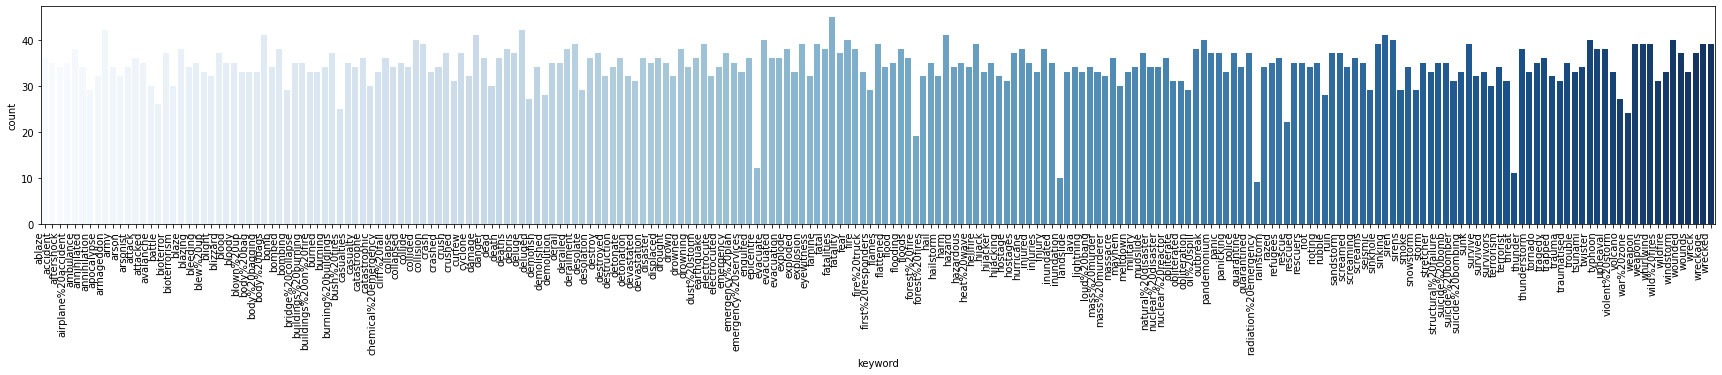

In [517]:
plt.figure(figsize=(30,4))
chart = sns.countplot(df['keyword'], palette='Blues')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Is there any correlation of the length of a tweet with its target. Try to visualize

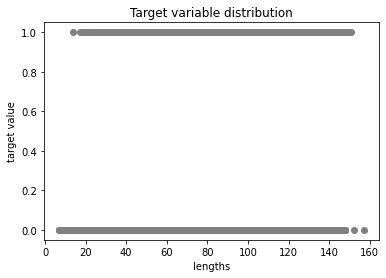

7

In [518]:
lengths = []
targets =[]
for i in range(df.shape[0]):
  t = df['text'][i]
  length = len(t)
  lengths.append(length)
  tar =  df['target'][i]
  targets.append(tar)
plt.scatter(lengths , targets, color='grey')
plt.xlabel("lengths")
plt.ylabel("target value")
plt.title("Target variable distribution")
plt.show()
df['lengths'] = lengths
df['lengths'].max()
df['lengths'].min()


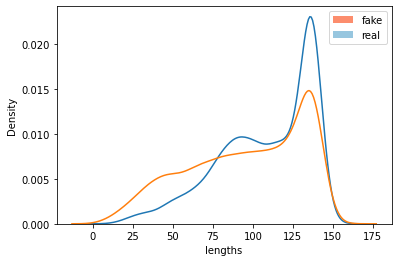

In [519]:
import matplotlib.patches as  mpatches
real_c = df[df["target"] == 1]["lengths"]
fake_c = df[df["target"] == 0]["lengths"]
sns.kdeplot(real_c)
sns.kdeplot(fake_c)
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="fake"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="real")]
plt.legend(handles=handles)
plt.show()

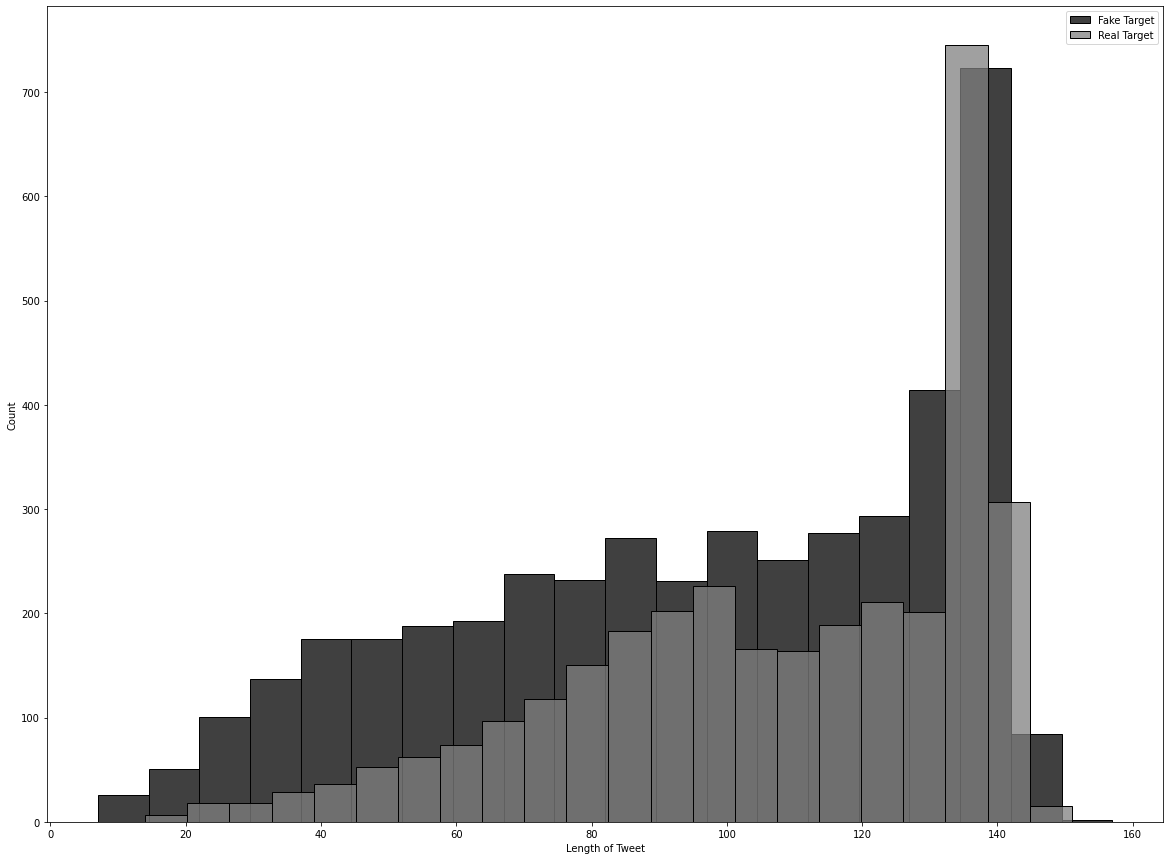

In [520]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.histplot(fake_c,color='black')
sns.histplot(real_c,color='grey')
plt.xlabel("Length of Tweet")
plt.legend(labels = ['Fake Target','Real Target'])

In [521]:
 import plotly.graph_objects as go

d = [
     go.Box(
        y=df[df['target']==0]['lengths'],
        name='Fake',
    ),
    go.Box(
        y=df[df['target']==1]['lengths'],
        name='Real'
    )
]
layout = go.Layout(
    title = 'Comparison of text lengths '
)
fig = go.Figure(data=d, layout=layout)
fig.show()

Print the number of null values in each column

In [522]:
columns_null = df.columns[df.isnull().any()]
print(df.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
lengths        0
dtype: int64


Remove the null values

In [523]:
df= df.dropna()
print(df.shape)
df.head()

(5080, 6)


,id,keyword,location,text,target,lengths
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76


Remove:


1.   Double Spaces
2.   Hypens and arrows
3.   Emojis
4.   URL
5.   Any other non english or special symbol

Replace wrong spellings with correct spellings



In [580]:
df["text"] = df["text"].astype(str)
df['mod_text'] = df['text'].str.lower() 
df.head()

,text,mod_text,target
31,@bbcmtd Wholesale Markets ablaze http://t.co/l...,@bbcmtd wholesale markets ablaze http://t.co/l...,1
32,We always try to bring the heavy. #metal #RT h...,we always try to bring the heavy. #metal #rt h...,0
33,#AFRICANBAZE: Breaking news:Nigeria flag set a...,#africanbaze: breaking news:nigeria flag set a...,1
34,Crying out for more! Set me ablaze,crying out for more! set me ablaze,0
35,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,on plus side look at the sky last night it was...,0


In [525]:
#removing hyphens and arrows
chars = ['  ','->','<-','=>','<=']
def remove_char(text,i):
  return text.translate(str.maketrans(i,'  ',''))


for i in chars:
  df["mod_text"] = df["mod_text"].apply(lambda t: remove_char(t,i))
df.head()

,id,keyword,location,text,target,lengths,mod_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,@bbcmtd wholesale markets ablaze http://t.co/l...
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,we always try to bring the heavy. #metal #rt h...
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,#africanbaze: breaking news:nigeria flag set a...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,crying out for more! set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,on plus side look at the sky last night it was...


In [526]:
#removing URLs
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    

df["mod_text"] = df["mod_text"].apply(lambda t: remove_urls(t))
df.head()

,id,keyword,location,text,target,lengths,mod_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,@bbcmtd wholesale markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,we always try to bring the heavy. #metal #rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,#africanbaze: breaking news:nigeria flag set a...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,crying out for more! set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,on plus side look at the sky last night it was...


In [527]:
#removing emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df["mod_text"] = df["mod_text"].apply(lambda t: remove_emoji(t))
df.head()

,id,keyword,location,text,target,lengths,mod_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,@bbcmtd wholesale markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,we always try to bring the heavy. #metal #rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,#africanbaze: breaking news:nigeria flag set a...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,crying out for more! set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,on plus side look at the sky last night it was...


In [528]:
#removing emoticons
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df["mod_text"] = df["mod_text"].apply(lambda t: remove_emoticons(t))
df.head()

,id,keyword,location,text,target,lengths,mod_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,@bbcmtd wholesale markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,we always try to bring the heavy. #metal #rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,#africanbaze: breaking news:nigeria flag set a...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,crying out for more! set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,on plus side look at the sky last night it was...


In [529]:
import spacy
import string
pd.options.mode.chained_assignment = None
remove_punc =  string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', remove_punc))

df["mod_text"] = df["mod_text"].apply(lambda t: remove_punctuation(t))
df.head()


,id,keyword,location,text,target,lengths,mod_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,bbcmtd wholesale markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,we always try to bring the heavy metal rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,africanbaze breaking newsnigeria flag set abla...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,crying out for more set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,on plus side look at the sky last night it was...


In [530]:
df['mod_text'] = df['mod_text'].replace(to_replace=r'  ',value=' ',regex=True)
df['mod_text'] = df['mod_text'].replace(to_replace=r'-',value=' ',regex=True)
df['mod_text'] = df['mod_text'].replace(to_replace=r'%20',value=' ',regex=True)
df.head()

,id,keyword,location,text,target,lengths,mod_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,bbcmtd wholesale markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,we always try to bring the heavy metal rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,africanbaze breaking newsnigeria flag set abla...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,crying out for more set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,on plus side look at the sky last night it was...


In [565]:
df['mod_text']=df['mod_text'].str.replace(r'[^A-Za-z\s]','')
df.head()

,text,mod_text,target
31,@bbcmtd Wholesale Markets ablaze http://t.co/l...,bbcmtd wholesale markets ablaze,1
32,We always try to bring the heavy. #metal #RT h...,we always try to bring the heavy metal rt,0
33,#AFRICANBAZE: Breaking news:Nigeria flag set a...,africanbaze breaking newsnigeria flag set abla...,1
34,Crying out for more! Set me ablaze,crying out for more set me ablaze,0
35,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,on plus side look at the sky last night it was...,0


In [566]:
#spelling correction
!pip install pyspellchecker

In [ ]:
#spelling correction
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
df["mod_text"] = df["mod_text"].apply(lambda t: correct_spelling(t))
df.head()

Plot a word cloud of real target and fake target

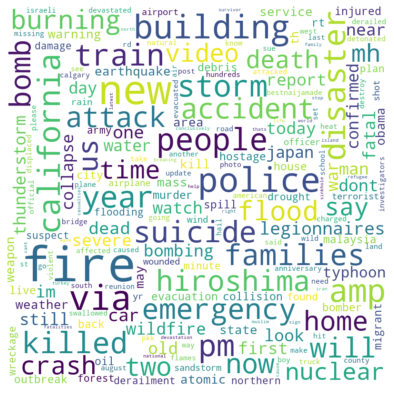

In [568]:
from wordcloud import WordCloud
real_t = df[df["target"] == 1]
all_words = ' '.join([text for text in real_t['mod_text']])
wordcloud = WordCloud(width= 800, height= 800,
                          max_font_size = 100,
                      background_color='white',
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

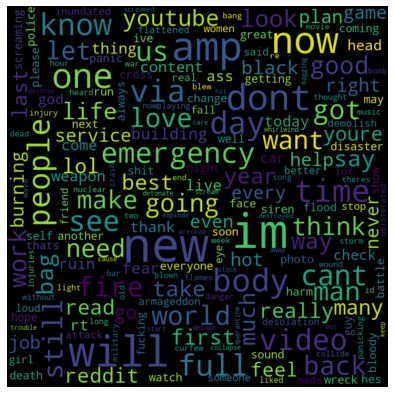

In [569]:
from wordcloud import WordCloud
fake_t = df[df["target"] == 0]
all_words = ' '.join([text for text in fake_t['mod_text']])
wordcloud = WordCloud(width= 800, height= 800,
                          max_font_size = 100,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Keep only text and target column in the dataset

In [570]:
df = df[['text','mod_text','target']]
print(df.shape)
df.head()

(5080, 3)


,text,mod_text,target
31,@bbcmtd Wholesale Markets ablaze http://t.co/l...,bbcmtd wholesale markets ablaze,1
32,We always try to bring the heavy. #metal #RT h...,we always try to bring the heavy metal rt,0
33,#AFRICANBAZE: Breaking news:Nigeria flag set a...,africanbaze breaking newsnigeria flag set abla...,1
34,Crying out for more! Set me ablaze,crying out for more set me ablaze,0
35,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,on plus side look at the sky last night it was...,0


Split data into train and validation

In [537]:
from sklearn.model_selection import train_test_split
x = df['mod_text']
y = df['target']
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.25, random_state=40)

Print the count of unique words

In [538]:
from collections import Counter
def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count
print(counter_word(x))

Counter({'the': 2211, 'a': 1506, 'in': 1350, 'to': 1327, 'of': 1253, 'i': 963, 'and': 958, 'for': 613, 'is': 605, 'on': 584, 'you': 529, 'my': 430, 'it': 417, 'with': 396, 'that': 395, 'at': 378, 'by': 343, 'this': 332, 'from': 287, 'be': 283, 'are': 278, 'have': 277, 'was': 274, 'as': 239, 'like': 235, 'but': 230, 'just': 222, 'im': 216, 'up': 215, 'so': 205, 'not': 205, 'your': 199, 'amp': 196, 'me': 194, 'will': 192, 'its': 189, 'out': 184, 'new': 178, 'fire': 173, 'an': 172, 'all': 170, 'we': 167, 'has': 167, 'when': 167, 'after': 167, 'no': 165, 'now': 160, 'if': 159, 'via': 159, 'get': 155, 'about': 149, 'what': 144, 'he': 142, 'more': 139, 'people': 134, 'dont': 133, 'or': 129, 'one': 125, 'how': 121, 'been': 121, 'news': 120, 'emergency': 120, 'they': 119, 'who': 118, 'were': 117, 'over': 116, 'do': 115, 'us': 113, 'into': 112, 'police': 107, 'there': 106, 'video': 104, 'can': 101, 'disaster': 98, 'than': 94, 'some': 92, 'still': 90, 'time': 89, 'man': 88, 'would': 88, 'day': 8

Compute the Term-Document Matrix (TDM) for all classes.

Print the dataframe with number of columns = number of unique words and the row showing the count of that word in a sentence.

In [539]:
#Term Document matrix for the whole dataset
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vct = vectorizer.fit_transform(df['mod_text'])
print(vectorizer.get_feature_names())

['aa', 'aaaa', 'aaaaaaallll', 'aaaaaand', 'aal', 'aampb', 'aannnnd', 'aar', 'aaronthefm', 'aashiqui', 'aba', 'abandon', 'abandoned', 'abandoning', 'abbott', 'abbruchsimulator', 'abbswinston', 'abbyairshow', 'abc', 'abcchicago', 'abceyewitness', 'abcnews', 'abcnorio', 'abcs', 'abe', 'aberdeen', 'aberdeenfanpage', 'aberdeenfc', 'aberystwyth', 'abes', 'abha', 'abia', 'ability', 'abject', 'ablaze', 'able', 'ableg', 'abninfvet', 'abomb', 'abomination', 'abortion', 'about', 'above', 'absolute', 'absolutely', 'absolutsumya', 'abstorm', 'abstract', 'absurd', 'absurdly', 'abuse', 'abused', 'abuseddesolateamplost', 'abuses', 'abusing', 'abysmaljoiner', 'ac', 'acarewornheart', 'acc', 'accept', 'accepts', 'access', 'accident', 'accidentally', 'accidentalprophecy', 'accidently', 'accidents', 'accidentwho', 'accompanying', 'according', 'account', 'accounts', 'accuracy', 'accused', 'accuses', 'accustomed', 'acdcd', 'acebabes', 'acebreakingnews', 'acesse', 'achedin', 'achieve', 'achievement', 'achievi

In [ ]:
pd.DataFrame(vct.toarray(),columns=vectorizer.get_feature_names())

In [540]:
#TDM for class 1
vectorizer = CountVectorizer()
vct = vectorizer.fit_transform(df[df["target"] == 1]['mod_text'])
print(vectorizer.get_feature_names())

['aa', 'aaaaaaallll', 'aaaaaand', 'aal', 'aampb', 'aashiqui', 'aba', 'abandon', 'abandoned', 'abbswinston', 'abbyairshow', 'abc', 'abcchicago', 'abcnews', 'abcnorio', 'abcs', 'abe', 'aberystwyth', 'abes', 'abha', 'abia', 'ablaze', 'able', 'ableg', 'abninfvet', 'abomb', 'abortion', 'about', 'above', 'absolute', 'abstorm', 'absurd', 'abuse', 'abuseddesolateamplost', 'abuses', 'abusing', 'ac', 'acc', 'accept', 'accident', 'accidentally', 'accidents', 'accidentwho', 'according', 'account', 'accounts', 'accuracy', 'accused', 'accuses', 'acdcd', 'acebreakingnews', 'achedin', 'acid', 'acquire', 'acquired', 'acres', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activated', 'activates', 'activist', 'activity', 'actress', 'acts', 'actually', 'acute', 'adamantly', 'adamnibloe', 'adamtuss', 'add', 'added', 'addict', 'adding', 'address', 'adjust', 'adjustable', 'admin', 'administration', 'adriasimon', 'adult', 'adultblackmale', 'adults', 'advance', 'adverse', 'advised', 'advisory', 'adw

In [541]:
pd.DataFrame(vct.toarray(),columns=vectorizer.get_feature_names())

,aa,aaaaaaallll,aaaaaand,aal,aampb,aashiqui,aba,abandon,abandoned,abbswinston,abbyairshow,abc,abcchicago,abcnews,abcnorio,abcs,abe,aberystwyth,abes,abha,abia,ablaze,able,ableg,abninfvet,abomb,abortion,about,above,absolute,abstorm,absurd,abuse,abuseddesolateamplost,abuses,abusing,ac,acc,accept,accident,...,yours,yourself,yourselves,yourstate,youth,youtube,youve,ypg,ypres,yr,yrs,yug,yugvani,yyc,yycfringe,yycstorm,yycwalks,yyj,yzf,zaatari,zaibatsunews,zakbagans,zakuun,zaman,zaynmaiikist,zeal,zehrs,zergele,zimmer,zimpapersviews,zionism,zionist,zkesk,zojadelin,zomatoaus,zombie,zone,zones,zotar,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [546]:
vectorizer = CountVectorizer()
vct = vectorizer.fit_transform(df[df["target"] == 0]['mod_text'])
print(vectorizer.get_feature_names())

['aaaa', 'aannnnd', 'aar', 'aaronthefm', 'aba', 'abandon', 'abandoning', 'abbott', 'abbruchsimulator', 'abc', 'abceyewitness', 'abcnews', 'aberdeen', 'aberdeenfanpage', 'aberdeenfc', 'ability', 'abject', 'ablaze', 'able', 'abomination', 'abortion', 'about', 'above', 'absolutely', 'absolutsumya', 'abstract', 'absurdly', 'abuse', 'abused', 'abuseddesolateamplost', 'abysmaljoiner', 'ac', 'acarewornheart', 'accept', 'accepts', 'access', 'accident', 'accidentally', 'accidentalprophecy', 'accidently', 'accidents', 'accompanying', 'according', 'account', 'accused', 'accuses', 'accustomed', 'acebabes', 'acesse', 'achieve', 'achievement', 'achieving', 'aching', 'acoustic', 'acquisitions', 'acronym', 'across', 'act', 'actavis', 'acted', 'actin', 'acting', 'action', 'actions', 'activate', 'activated', 'active', 'activities', 'activity', 'actor', 'actual', 'actually', 'ad', 'adam', 'adani', 'adanne', 'add', 'added', 'addiction', 'addicts', 'adding', 'addition', 'address', 'addresses', 'addtexaston

In [547]:
pd.DataFrame(vct.toarray(),columns=vectorizer.get_feature_names())

,aaaa,aannnnd,aar,aaronthefm,aba,abandon,abandoning,abbott,abbruchsimulator,abc,abceyewitness,abcnews,aberdeen,aberdeenfanpage,aberdeenfc,ability,abject,ablaze,able,abomination,abortion,about,above,absolutely,absolutsumya,abstract,absurdly,abuse,abused,abuseddesolateamplost,abysmaljoiner,ac,acarewornheart,accept,accepts,access,accident,accidentally,accidentalprophecy,accidently,...,youth,youtube,youve,yrs,yuan,yukis,yum,yunita,yup,yuppies,yuuko,yuvi,zach,zaire,zakbagans,zamtriossu,zar,zarharzar,zarry,zayn,zenandemcfen,zenit,zeno,zepp,zero,zhenghxn,zimbabwe,zip,zippoline,zodiac,zombie,zombiefunrun,zombies,zone,zoom,zouma,zss,zumiez,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Frequency of words in class 0 and 1

In [548]:
from collections import Counter
#class 1
f_real=df[df["target"] == 1]
f_class1=Counter()
f_real['mod_text'].str.split().apply(f_class1.update)
f_class1

Counter({'bbcmtd': 1,
         'wholesale': 3,
         'markets': 3,
         'ablaze': 11,
         'africanbaze': 1,
         'breaking': 18,
         'newsnigeria': 1,
         'flag': 15,
         'set': 20,
         'in': 775,
         'aba': 5,
         'inec': 2,
         'office': 7,
         'abia': 2,
         'how': 37,
         'the': 908,
         'west': 18,
         'was': 120,
         'burne': 2,
         'thousands': 8,
         'of': 622,
         'wildfires': 8,
         'california': 63,
         'alone': 4,
         'deputies': 4,
         'man': 37,
         'shot': 16,
         'before': 12,
         'brighton': 2,
         'home': 29,
         'wife': 5,
         'get': 51,
         'six': 4,
         'years': 35,
         'jail': 1,
         'for': 263,
         'setting': 5,
         'niece': 1,
         'police': 83,
         'arsonist': 6,
         'deliberately': 1,
         'black': 14,
         'church': 3,
         'north': 18,
         'carolinaablaze

In [549]:
#class 0
f_fake=df[df["target"]==0]
f_class0=Counter()
f_fake['mod_text'].str.split().apply(f_class0.update)
f_class0

Counter({'we': 108,
         'always': 24,
         'try': 10,
         'to': 813,
         'bring': 9,
         'the': 1303,
         'heavy': 2,
         'metal': 6,
         'rt': 32,
         'crying': 5,
         'out': 129,
         'for': 350,
         'more': 67,
         'set': 17,
         'me': 159,
         'ablaze': 11,
         'on': 284,
         'plus': 3,
         'side': 14,
         'look': 27,
         'at': 155,
         'sky': 6,
         'last': 39,
         'night': 23,
         'it': 279,
         'was': 154,
         'phdsquares': 1,
         'mufc': 2,
         'theyve': 2,
         'built': 6,
         'so': 155,
         'much': 43,
         'hype': 1,
         'around': 15,
         'new': 134,
         'acquisitions': 2,
         'but': 159,
         'i': 736,
         'doubt': 5,
         'they': 78,
         'will': 136,
         'epl': 1,
         'this': 194,
         'season': 7,
         'you': 436,
         'lord': 14,
         'd': 10,
         'c

Does the sum of the unique words in target 0 and 1 sum upto the total number of unique words in the whole document? Why or why not? Explain in report.

In [582]:
df['mod_text'].nunique() == ((df[df["target"] == 1]['mod_text'].nunique())+(df[df["target"] == 0]['mod_text'].nunique()))
#to check whether the sum of the unique words in target 0 and 1 sum upto the total number of unique words in the whole document 

False

Total frequency

In [551]:
#sum of the unique words in target 0 and 1 
sum = f_class0+f_class1
sum

Counter({'we': 167,
         'always': 29,
         'try': 13,
         'to': 1327,
         'bring': 13,
         'the': 2211,
         'heavy': 17,
         'metal': 10,
         'rt': 63,
         'crying': 6,
         'out': 184,
         'for': 613,
         'more': 139,
         'set': 37,
         'me': 194,
         'ablaze': 22,
         'on': 584,
         'plus': 6,
         'side': 19,
         'look': 47,
         'at': 378,
         'sky': 12,
         'last': 58,
         'night': 31,
         'it': 417,
         'was': 274,
         'phdsquares': 1,
         'mufc': 2,
         'theyve': 4,
         'built': 6,
         'so': 205,
         'much': 52,
         'hype': 1,
         'around': 29,
         'new': 178,
         'acquisitions': 2,
         'but': 230,
         'i': 963,
         'doubt': 5,
         'they': 119,
         'will': 192,
         'epl': 1,
         'this': 332,
         'season': 11,
         'you': 529,
         'lord': 16,
         'd': 17,
   

In [552]:
#total unique words frequency in the document
count_total=Counter()
df['mod_text'].str.split().apply(count_total.update)
count_total

Counter({'bbcmtd': 1,
         'wholesale': 4,
         'markets': 4,
         'ablaze': 22,
         'we': 167,
         'always': 29,
         'try': 13,
         'to': 1327,
         'bring': 13,
         'the': 2211,
         'heavy': 17,
         'metal': 10,
         'rt': 63,
         'africanbaze': 1,
         'breaking': 33,
         'newsnigeria': 1,
         'flag': 18,
         'set': 37,
         'in': 1350,
         'aba': 11,
         'crying': 6,
         'out': 184,
         'for': 613,
         'more': 139,
         'me': 194,
         'on': 584,
         'plus': 6,
         'side': 19,
         'look': 47,
         'at': 378,
         'sky': 12,
         'last': 58,
         'night': 31,
         'it': 417,
         'was': 274,
         'phdsquares': 1,
         'mufc': 2,
         'theyve': 4,
         'built': 6,
         'so': 205,
         'much': 52,
         'hype': 1,
         'around': 29,
         'new': 178,
         'acquisitions': 2,
         'but': 230,


In [554]:
sum == count_total

True

Calculate the probability for each word in a given class.

Class 0

In [555]:
c_0=pd.DataFrame()
c_0['word']=f_class0.keys()
c_0['count']=f_class0.values()
sum_0 = 0
for count in c_0['count']:
  sum_0 += count
c_0['probability']=c_0['count']/(sum_0)
c_0.head()

,word,count,probability
0,we,108,0.002670
1,always,24,0.000593
2,try,10,0.000247
3,to,813,0.020096
4,bring,9,0.000222


Class 1

In [557]:
c_1=pd.DataFrame()
c_1['word']=f_class1.keys()
c_1['count']=f_class1.values()
sum_1 = 0
for count in c_1['count']:
  sum_1 +=count
c_1['probability']=c_1['count']/(sum_1)

We have calculated the probability of occurrence of word in a class, we can now substitute the values in the Baye's equation. 

If a word from the new sentence does not occur in the class within the training set, the equation becomes zero. This problem can be solved using smoothing like Laplace smoothing. 

Probability for class 0

In [571]:
total_value = df['mod_text'].nunique()
prob_0=[]
t=Counter()
df['mod_text'].str.split().apply(t.update)
for i in t.keys():
  if i in list(f_class0.keys()):
    count0=f_class0[i]
  else:
    count0=0
  prob_0.append((count0+1)/(sum_0+total_value))

In [572]:
laplace0=pd.DataFrame()
laplace0['text']=t.keys()
laplace0['probability']=prob_0

Probability for class 1

In [573]:
prob_1=[]
t = df['mod_text']
for i in t.keys():
  if i in list(f_class1.keys()):
    count=f_class1[i]
  else:
    count=0
  prob_1.append((count+1)/(sum_1+total_value))

In [575]:
laplace1=pd.DataFrame()
laplace1['text']=t.keys()
laplace1['probability']=prob_1

Print target class

In [578]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score

References:

[Ref1](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)